# 1. [shivamardeshna](https://www.kaggle.com/datasets/shivamardeshna/real-and-fake-images-dataset-for-image-forensics)

In [ ]:
import os
from PIL import Image
import shutil
import kagglehub

# Download latest version
directory = kagglehub.dataset_download("shivamardeshna/real-and-fake-images-dataset-for-image-forensics")

print("Path to dataset files:", directory)

real = 0
fake = 0
dimension_dict = {}
file_size = {}
extensions = set()

for i in ['real', 'fake']:
    for j in ['train', 'test', 'validation']:
        if not os.path.exists(os.path.join(directory, f'{i}_{j}')):
            os.mkdir(os.path.join(directory, f'{i}_{j}'))

for root, dirs, files in os.walk(directory):
    up_two = root.split(os.sep)[-1] + '_' + root.split(os.sep)[-2]
    if len(root.split(os.sep)) == 13:
        if root.split(os.sep)[-1] == 'real':
            parent_dir_name = root.split(os.sep)[-2]
            for filename in files:
                extensions.add(filename.split('.')[-1])
                with Image.open(os.path.join(root, filename)) as img:
                    width, height = img.size
                    if f'{width}x{height}' not in dimension_dict:
                        dimension_dict[f'{width}x{height}'] = 1
                    else:
                        dimension_dict[f'{width}x{height}'] += 1
                if not filename.startswith('real_'):
                    old_path = os.path.join(root, filename)

                    file_size_num = os.path.getsize(old_path)
                    if file_size_num not in file_size:
                        file_size[file_size_num] = 1
                    else:
                        file_size[file_size_num] += 1

                    new_name = 'real_' + filename
                    new_path = os.path.join(directory, up_two, new_name)
                    shutil.move(old_path, new_path)
                    real += 1
                else:
                    old_path = os.path.join(root, filename)
                    new_path = os.path.join(directory, up_two, filename)
                    shutil.move(old_path, new_path)
                    real += 1

        if root.split(os.sep)[-1] == 'fake':
            parent_dir_name = root.split(os.sep)[-2]
            for filename in files:
                extensions.add(filename.split('.')[-1])
                with Image.open(os.path.join(root, filename)) as img:
                    width, height = img.size
                    if f'{width}x{height}' not in dimension_dict:
                        dimension_dict[f'{width}x{height}'] = 1
                    else:
                        dimension_dict[f'{width}x{height}'] += 1
                if not filename.startswith('fake_'):
                    old_path = os.path.join(root, filename)

                    file_size_num = os.path.getsize(old_path)
                    if file_size_num not in file_size:
                        file_size[file_size_num] = 1
                    else:
                        file_size[file_size_num] += 1

                    new_name = 'fake_' + filename
                    new_path = os.path.join(directory, up_two, new_name)
                    shutil.move(old_path, new_path)
                    fake += 1
                else:
                    old_path = os.path.join(root, filename)
                    new_path = os.path.join(directory, up_two, filename)
                    shutil.move(old_path, new_path)
                    fake += 1

print(f'# real: {real} || # fake: {fake} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 2.76G/2.76G [00:34<00:00, 85.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamardeshna/real-and-fake-images-dataset-for-image-forensics/versions/1
# real: 115201 || # fake: 115134 || {'256x256': 230335} || {'jpg'} || {32135: 3, 31526: 4, 28941: 5, 26676: 2, 35582: 2, 27213: 6, 22661: 1, 36386: 2, 31308: 3, 31741: 2, 25131: 6, 34568: 3, 25435: 2, 24561: 3, 30091: 2, 29559: 7, 32563: 2, 27183: 6, 40306: 1, 18240: 1, 33209: 3, 28550: 6, 29954: 5, 30857: 7, 26569: 10, 28123: 3, 26944: 3, 28065: 4, 30297: 3, 26866: 4, 33234: 2, 28683: 8, 31368: 6, 38286: 1, 29925: 4, 30515: 5, 31366: 3, 26420: 3, 27952: 6, 26137: 6, 30171: 2, 28047: 6, 30374: 9, 27684: 6, 23257: 4, 28008: 3, 24991: 4, 28228: 3, 28179: 5, 32024: 6, 29526: 8, 26389: 6, 29022: 5, 30401: 2, 30453: 6, 34001: 2, 20775: 2, 29461: 4, 41440: 2, 27061: 2, 29045: 6, 23332: 4, 26963: 4, 25413: 5, 31934: 3, 24231: 6, 31017: 6, 27230: 5, 35545: 2, 21440: 2, 27569: 4, 29460: 8, 30482: 8, 35876: 2, 25292: 2, 29645: 6, 30285: 4, 25512: 4, 30798: 6, 28261: 4

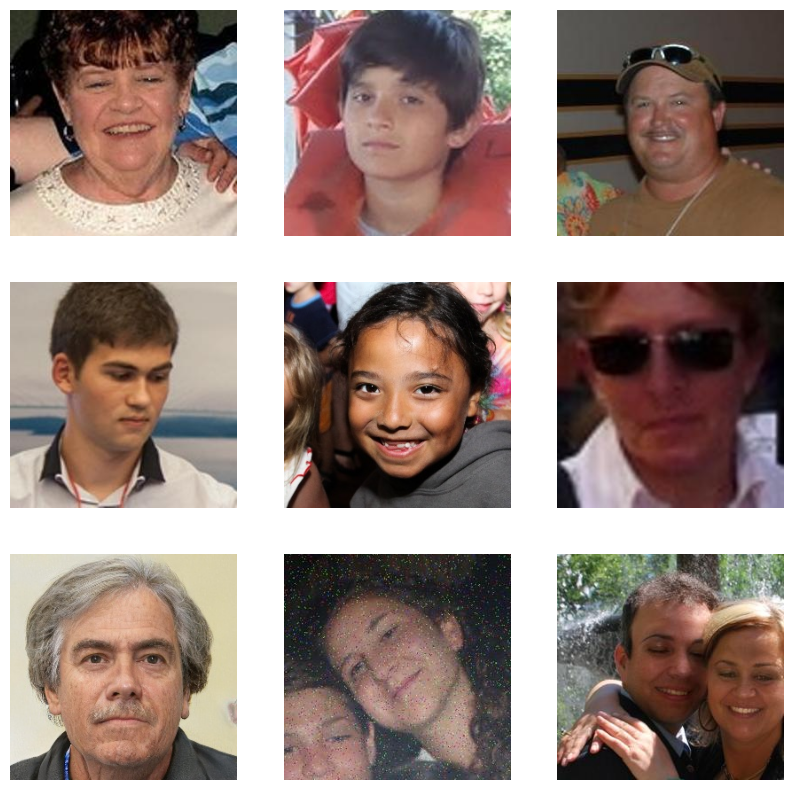

In [ ]:
import random
import matplotlib.pyplot as plt

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


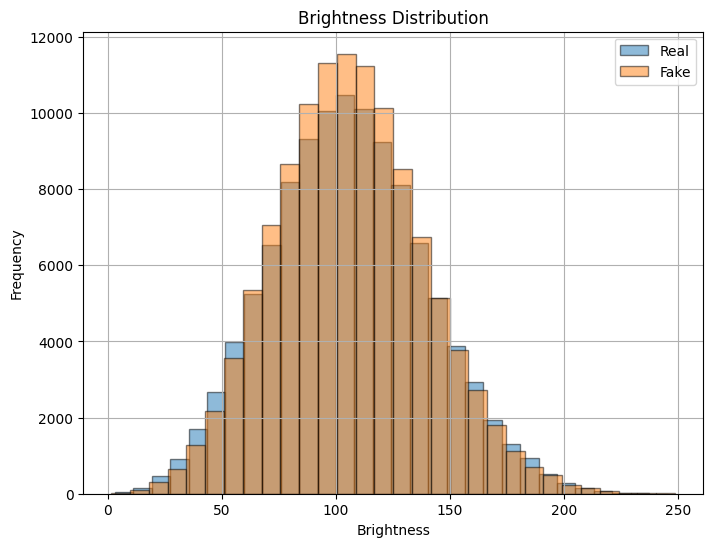

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            brightness = get_brightness(file_path)
            if file.startswith('real_'):
                brightness_values['real'].append(brightness)
            else:
                brightness_values['fake'].append(brightness)

plt.figure(figsize=(8, 6))
plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


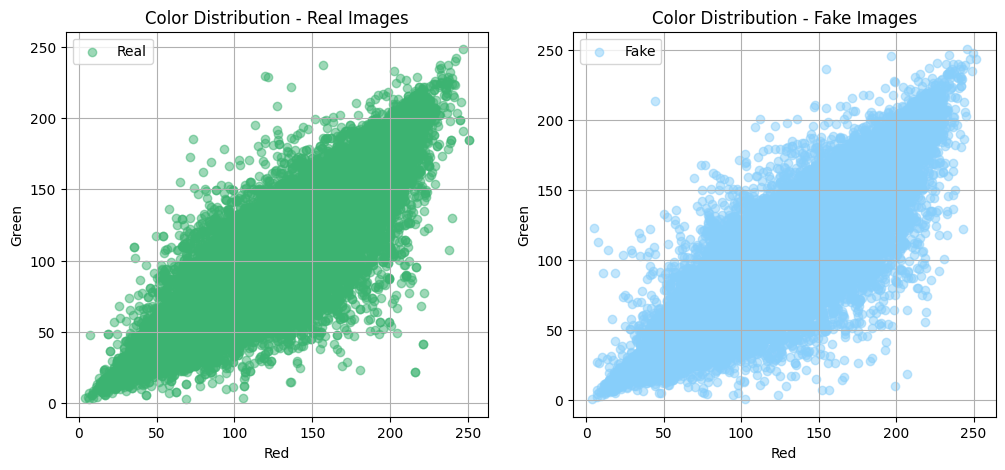

In [ ]:
def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            avg_color = get_avg_color(file_path)
            if file.startswith('real_'):
                real_colors.append(avg_color)
            else:
                fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real Images")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake Images")

plt.show()


# 2. [Yonsei](https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection)

In [ ]:
import kagglehub

import os
from PIL import Image
import shutil

# Download latest version
directory = kagglehub.dataset_download("ciplab/real-and-fake-face-detection")

print("Path to dataset files:", directory)

real = 0
fake = 0
difficulty = {'easy': 0, 'mid': 0, 'hard': 0}
dimension_dict = {}
file_size = {}
extensions = set()

for root, dirs, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for filename in files:
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        if filename.startswith('real_'):
            real += 1
        else:
            fake += 1
            if filename.startswith('easy_'):
                difficulty['easy'] += 1
            elif filename.startswith('mid_'):
                difficulty['mid'] += 1
            elif filename.startswith('hard_'):
                difficulty['hard'] += 1

print(f'# real: {real} || # fake: {fake} -> {difficulty} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
# file_size_num.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1
# real: 1081 || # fake: 960 -> {'easy': 240, 'mid': 480, 'hard': 240} || {'600x600': 2041} || {'jpg'} || {155286: 1, 100740: 1, 109420: 1, 89404: 1, 173786: 1, 131429: 1, 209211: 1, 82727: 1, 73290: 1, 92832: 1, 45322: 1, 189661: 1, 92783: 1, 87314: 1, 150925: 1, 138634: 1, 72877: 1, 114928: 1, 81733: 1, 124316: 1, 103579: 1, 106962: 1, 98972: 1, 126127: 1, 99020: 1, 158232: 1, 102366: 1, 79825: 1, 43858: 1, 95626: 1, 100055: 1, 84408: 1, 138206: 1, 166591: 1, 190982: 1, 92772: 1, 126704: 1, 73532: 1, 108615: 1, 111434: 1, 86730: 1, 95553: 1, 103101: 1, 49753: 1, 118540: 1, 109371: 1, 97879: 1, 35998: 1, 90355: 1, 125922: 1, 97444: 1, 109520: 1, 100285: 1, 139578: 1, 124338: 2, 84348: 1, 69492: 1, 56986: 1, 74525: 1, 91741: 1, 101139: 1, 114179: 1, 256255: 1, 131004: 1, 118914: 1, 118133: 1, 129203: 1, 141996: 1, 106150: 1, 291856: 1, 119144: 1, 177333: 1, 93850: 1, 110468: 1, 165549: 

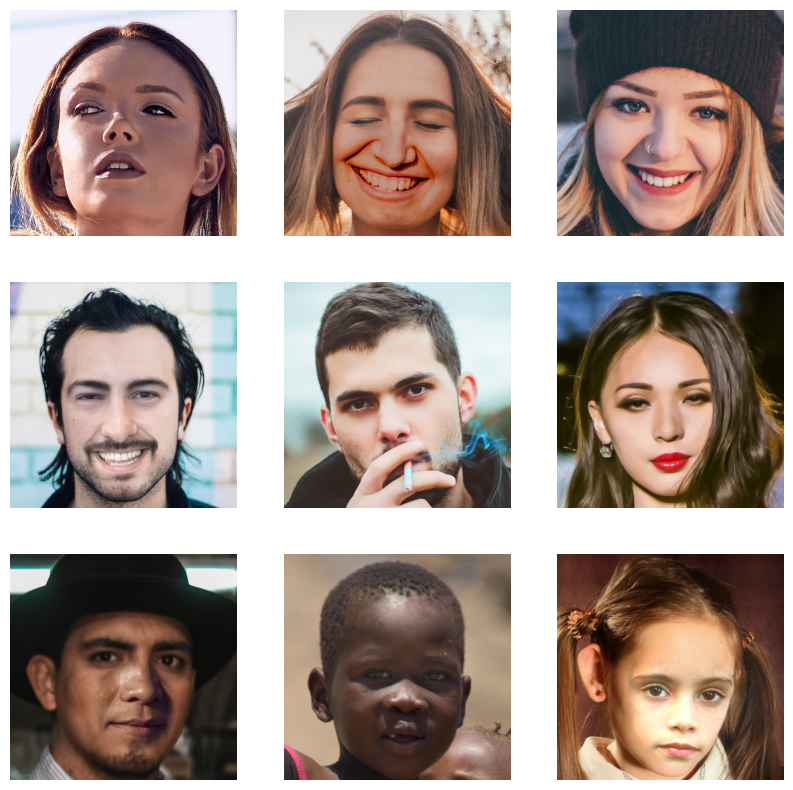

In [ ]:
import matplotlib.pyplot as plt
import random

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


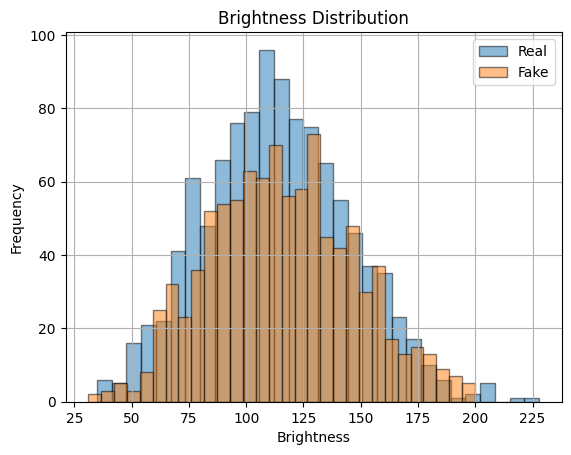

In [ ]:
from PIL import ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for file in files:
        file_path = os.path.join(root, file)
        if file.startswith('real_'):
            brightness_values['real'].append(get_brightness(file_path))
        else:
            brightness_values['fake'].append(get_brightness(file_path))

plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


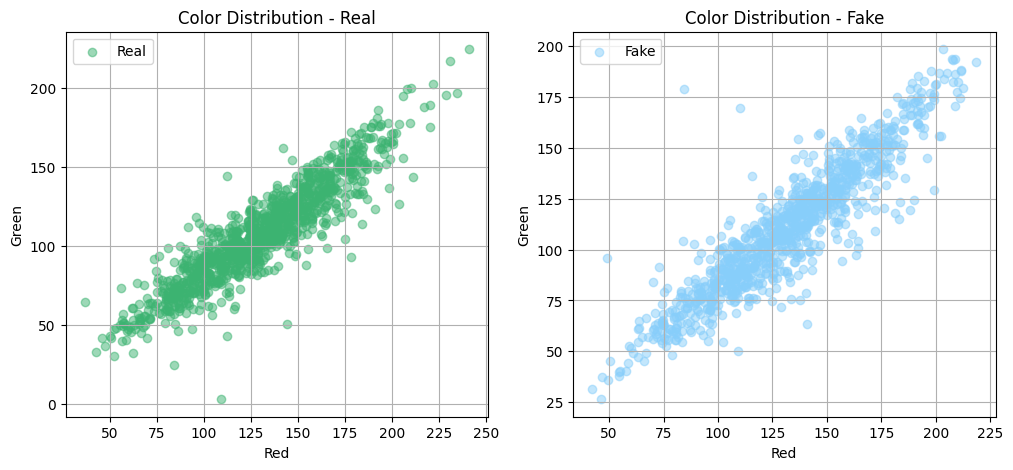

In [ ]:
import numpy as np

def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for file in files:
        file_path = os.path.join(root, file)
        avg_color = get_avg_color(file_path)
        if file.startswith('real_'):
            real_colors.append(avg_color)
        else:
            fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake")

plt.show()


# 3. [CelebA](https://www.kaggle.com/datasets/jessicali9530/celeba-dataset)

In [2]:
import kagglehub
import os
import pandas as pd
from PIL import Image

directory = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", directory)

attr = pd.read_csv(os.path.join(directory, 'list_attr_celeba.csv'))

dimension_dict = {}
file_size = {}
extensions = set()

for root, dirs, files in os.walk(os.path.join(directory, 'img_align_celeba', 'img_align_celeba')):
    for filename in files:
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1

print(f'{attr.Male.value_counts()} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
file_size.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2
Male
-1    118165
 1     84434
Name: count, dtype: int64 || {'178x218': 202599} || {'jpg'} || {5763: 48, 5515: 48, 5997: 65, 6096: 69, 8085: 38, 7570: 49, 7772: 46, 7194: 74, 6468: 88, 6130: 55, 8300: 28, 6653: 93, 9369: 10, 6831: 58, 4641: 6, 8072: 39, 8013: 35, 7071: 68, 7122: 73, 5824: 65, 8724: 29, 7044: 70, 8127: 41, 4164: 3, 5426: 29, 8078: 34, 8456: 25, 8483: 24, 7429: 57, 6948: 69, 6142: 58, 7149: 66, 5769: 51, 6693: 77, 5599: 47, 7462: 54, 6922: 80, 6871: 66, 7871: 52, 5509: 37, 6414: 79, 7089: 66, 5308: 28, 6523: 71, 7032: 69, 7277: 57, 9706: 8, 6157: 64, 7208: 72, 5750: 54, 5068: 17, 6406: 70, 6804: 64, 6043: 52, 6509: 75, 7913: 41, 6110: 59, 6306: 51, 8788: 19, 7124: 66, 6498: 85, 6713: 75, 6865: 66, 5332: 33, 7884: 35, 4362: 5, 7260: 74, 7375: 48, 7012: 64, 7623: 48, 6783: 85, 8175: 28, 6444: 68, 6440: 73, 6266: 72, 5171: 21, 7601: 45, 8163: 35, 4952: 24, 6650: 79, 5478: 46, 7187

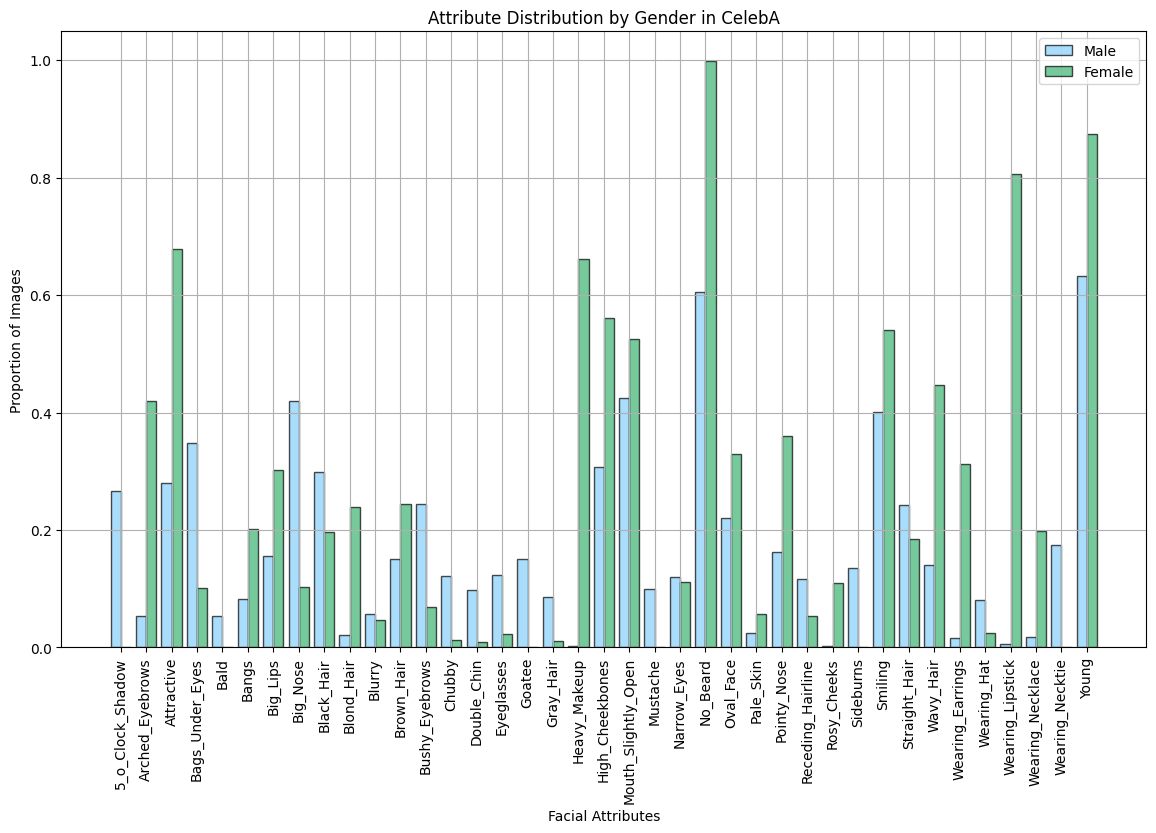

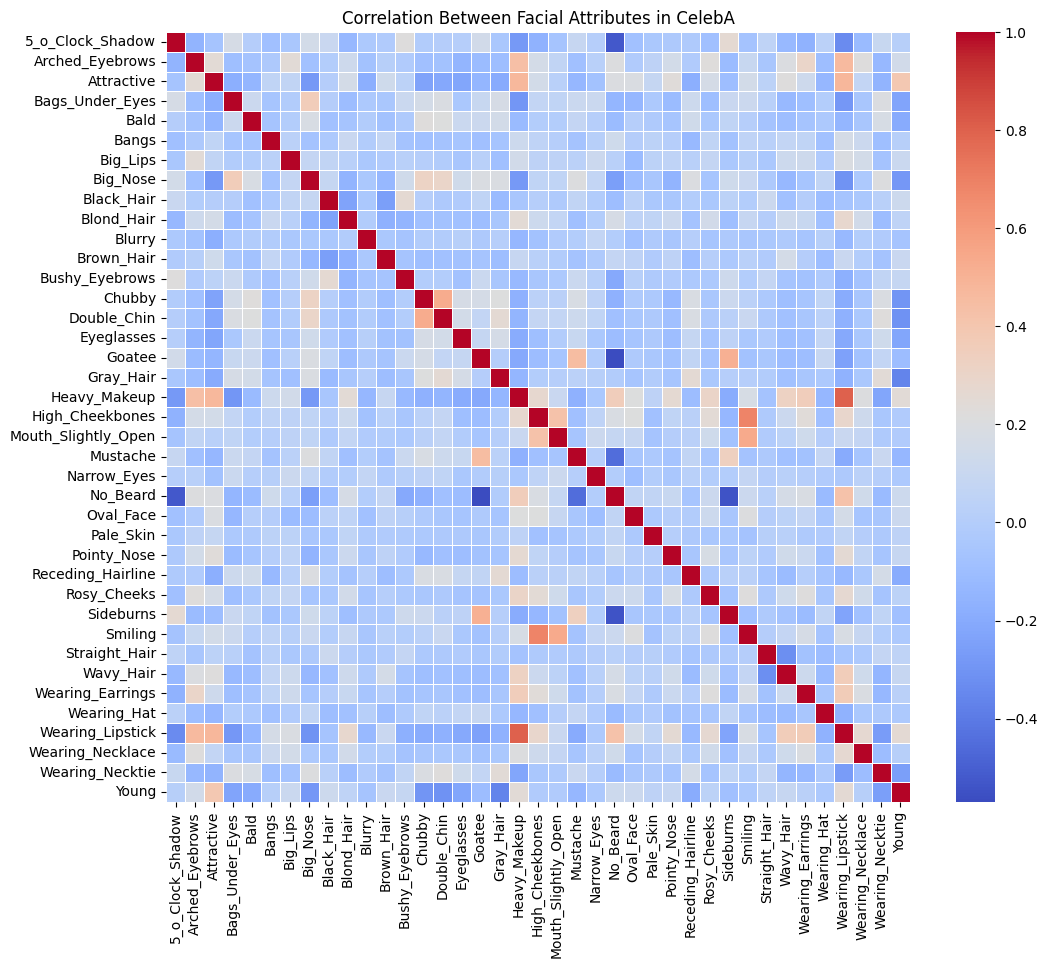

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = "/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv"

df = pd.read_csv(csv_path)
df.replace(-1, 0, inplace=True)

male_attrs = df[df["Male"] == 1].drop(columns=["image_id", "Male"]).mean()
female_attrs = df[df["Male"] == 0].drop(columns=["image_id", "Male"]).mean()

plt.figure(figsize=(14, 8))
x = range(len(male_attrs))
plt.bar(x, male_attrs, width=0.4, label="Male", alpha=0.7, color="lightskyblue", edgecolor='black')
plt.bar([i + 0.4 for i in x], female_attrs, width=0.4, label="Female", alpha=0.7, color="mediumseagreen", edgecolor='black')
plt.grid(True)

plt.xticks([i + 0.2 for i in x], male_attrs.index, rotation=90)
plt.xlabel("Facial Attributes")
plt.ylabel("Proportion of Images")
plt.title("Attribute Distribution by Gender in CelebA")
plt.legend()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=["image_id", "Male"]).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Facial Attributes in CelebA")
plt.show()


# 4. [140k Real and Fake Faces](https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces)

In [ ]:
import os
from PIL import Image
import shutil
import kagglehub

directory = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")
print("Path to dataset files:", directory)

deep_directory = os.path.join(directory, 'real_vs_fake', 'real-vs-fake')

real = 0
fake = 0
dimension_dict = {}
file_size = {}
extensions = set()

for category in ['real', 'fake']:
    for split in ['train', 'test', 'valid']:
        new_folder = os.path.join(directory, f'{category}_{split}')
        os.makedirs(new_folder, exist_ok=True)

for root, _, files in os.walk(deep_directory):
    path_parts = root.split(os.sep)

    if len(path_parts) < 2:
        continue

    dataset_type = path_parts[-2]
    category = path_parts[-1]

    if dataset_type in ['train', 'test', 'valid'] and category in ['real', 'fake']:
        for filename in files:
            file_extension = filename.split('.')[-1]
            extensions.add(file_extension)

            file_path = os.path.join(root, filename)

            file_size_num = os.path.getsize(file_path)
            if file_size_num not in file_size:
                file_size[file_size_num] = 1
            else:
                file_size[file_size_num] += 1

            with Image.open(file_path) as img:
                width, height = img.size
                dim_key = f'{width}x{height}'
                dimension_dict[dim_key] = dimension_dict.get(dim_key, 0) + 1

            new_filename = f"{category}_{filename}"
            new_folder = os.path.join(directory, f"{category}_{dataset_type}")
            new_path = os.path.join(new_folder, new_filename)
            shutil.move(file_path, new_path)

            if category == 'real':
                real += 1
            else:
                fake += 1

print(f'# real: {real} || # fake: {fake} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 3.75G/3.75G [00:53<00:00, 75.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2
# real: 70000 || # fake: 70000 || {'256x256': 140000} || {'jpg'} || {26208: 21, 25684: 12, 26388: 11, 34153: 3, 26737: 15, 23646: 8, 31893: 8, 22801: 4, 35996: 5, 31946: 15, 25298: 11, 29535: 16, 22137: 7, 25387: 15, 30008: 15, 25520: 17, 27802: 20, 26668: 16, 22741: 5, 33208: 3, 25319: 15, 28460: 16, 28559: 16, 30967: 11, 28657: 14, 33846: 5, 40356: 2, 26312: 14, 32012: 15, 31895: 12, 26772: 15, 22155: 7, 27199: 16, 27008: 18, 27845: 19, 30189: 12, 34920: 2, 26576: 17, 30361: 13, 40443: 1, 25921: 7, 28556: 28, 29224: 18, 30404: 12, 26240: 16, 29208: 12, 26200: 15, 31444: 7, 29143: 13, 32240: 10, 25420: 17, 30029: 12, 33913: 6, 33087: 8, 23229: 7, 29081: 19, 22834: 4, 28589: 17, 26878: 15, 34233: 8, 28078: 16, 30533: 14, 28150: 11, 29628: 18, 31612: 15, 27631: 14, 24714: 14, 27775: 13, 42979: 1, 26457: 20, 27852: 25, 26667: 15, 31079: 12, 32717: 10, 30081: 11, 23466: 10, 28447: 15, 33533: 

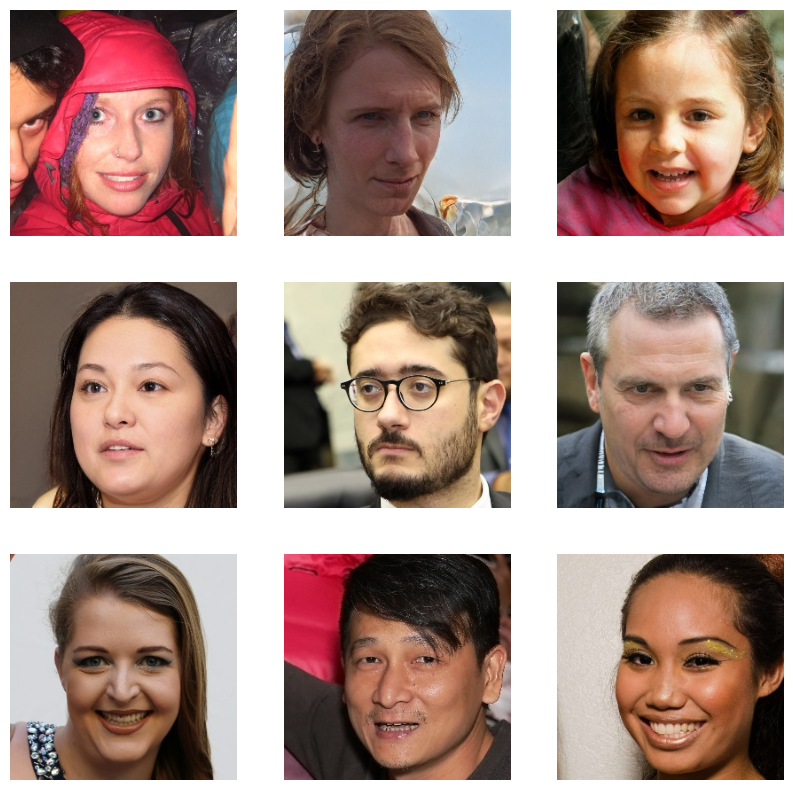

In [ ]:
import random
import matplotlib.pyplot as plt

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


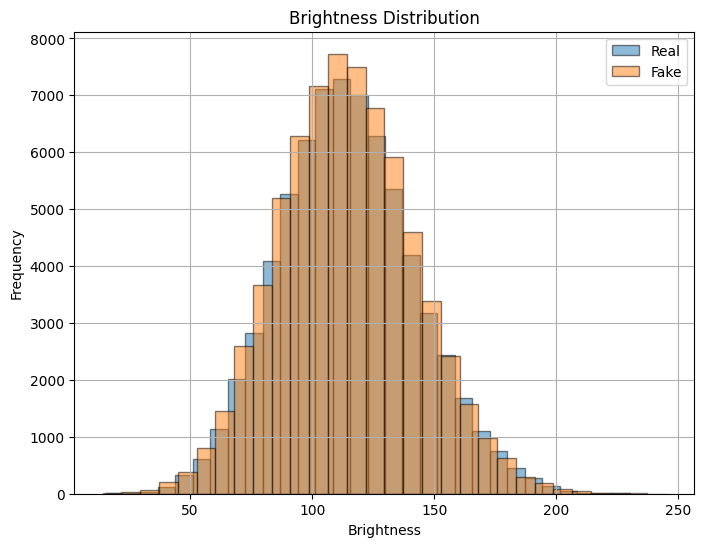

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            brightness = get_brightness(file_path)
            if file.startswith('real_'):
                brightness_values['real'].append(brightness)
            else:
                brightness_values['fake'].append(brightness)

plt.figure(figsize=(8, 6))
plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


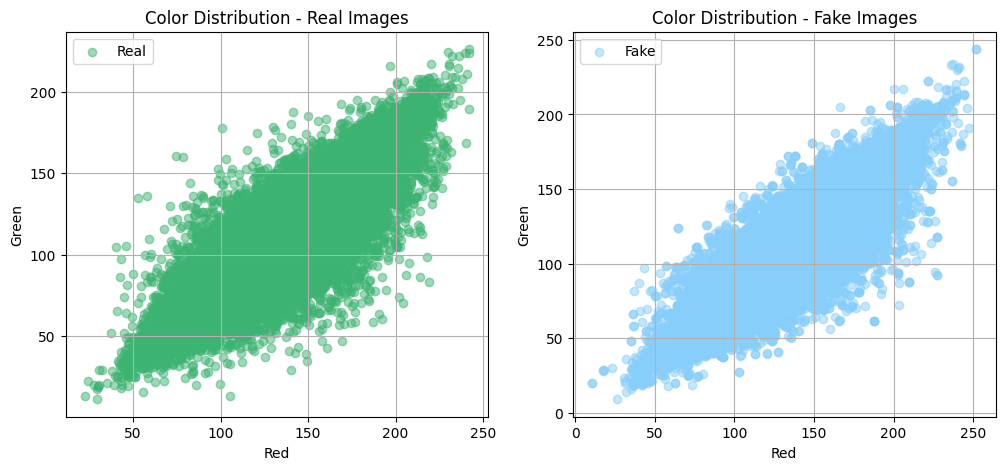

In [ ]:
def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            avg_color = get_avg_color(file_path)
            if file.startswith('real_'):
                real_colors.append(avg_color)
            else:
                fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real Images")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake Images")

plt.show()


# 5. [Biggest](https://www.kaggle.com/datasets/maciejgronczynski/biggest-genderface-recognition-dataset)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maciejgronczynski/biggest-genderface-recognition-dataset")

directory = os.path.join(path, 'versions/1/faces')

print("Path to dataset files:", path)

dimension_dict = {}
file_size = {}
num_files = 0
extensions = set()
male = 0
female = 0

for root, dirs, files in os.walk(path):
    for filename in files:
        if "woman" in filename:
            female += 1
        elif "man" in filename:
            male += 1

        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        num_files += 1

print(f'# male: {male} || # female: {female} \n{dimension_dict} \n{extensions} \n{file_size} \n{num_files}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 439M/439M [00:06<00:00, 67.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/maciejgronczynski/biggest-genderface-recognition-dataset/versions/1
# male: 17678 || # female: 9489 
{'94x130': 1, '100x100': 11630, '250x250': 13230, '111x147': 1, '305x359': 1, '162x168': 1, '148x205': 2, '153x204': 1, '232x313': 1, '81x152': 1, '112x152': 1, '160x196': 1, '167x222': 1, '133x189': 1, '176x246': 1, '188x232': 1, '338x414': 1, '75x79': 1, '772x898': 1, '293x368': 1, '152x195': 2, '113x154': 2, '222x253': 1, '204x268': 1, '217x293': 1, '128x178': 2, '261x308': 1, '145x195': 1, '143x195': 1, '322x384': 1, '171x219': 1, '313x403': 1, '102x112': 1, '237x284': 1, '68x93': 1, '135x152': 1, '246x325': 1, '114x140': 1, '313x451': 1, '360x347': 1, '58x75': 2, '433x555': 1, '58x74': 1, '154x205': 1, '78x104': 1, '41x52': 2, '59x82': 2, '84x109': 2, '462x617': 1, '105x132': 1, '80x110': 3, '81x106': 1, '205x253': 1, '404x426': 1, '103x146': 1, '259x337': 1, '154x225': 1, '63x87': 1, '118x146': 1, '72x86': 1, '142x190': 1, '19

# 6. [Ashwin](https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset)

In [ ]:
import kagglehub
import os
from PIL import Image

# Download latest version
path = kagglehub.dataset_download("ashwingupta3012/male-and-female-faces-dataset")

directory = os.path.join(path, 'Male and Female face dataset')

print("Path to dataset files:", directory)

dimension_dict = {}
file_size = {}
num_files = 0
extensions = set()
male = 0
female = 0

for root, dirs, files in os.walk(path):
    for filename in files:
        if filename.startswith("0"):
            female += 1
        elif filename.startswith("1"):
            male += 1
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        num_files += 1

print(f'# male: {male} || # female: {female} \n{dimension_dict} \n{extensions} \n{file_size} \n{num_files}')
dimension_dict.clear()
file_size.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset
# male: 2720 || # female: 2698 
{'915x915': 4, '957x1300': 51, '236x354': 47, '640x828': 2, '1008x1008': 9, '500x741': 3, '1280x1920': 35, '4684x4000': 3, '640x960': 48, '640x640': 32, '480x720': 27, '736x920': 25, '650x867': 4, '1558x2500': 5, '460x690': 3, '800x1200': 37, '675x900': 14, '497x750': 11, '961x1200': 10, '400x600': 18, '2700x4057': 23, '1080x1350': 39, '533x800': 30, '318x480': 7, '736x1104': 162, '1414x2121': 2, '1412x1600': 1, '736x736': 18, '768x1024': 11, '1280x1707': 6, '450x600': 18, '233x350': 3, '600x899': 4, '736x1043': 2, '994x1408': 2, '1000x1500': 14, '536x800': 3, '723x1085': 3, '2987x2213': 3, '563x738': 2, '678x1017': 2, '1200x1206': 3, '2400x3600': 17, '276x365': 3, '564x846': 7, '1066x1332': 4, '255x370': 7, '500x693': 2, '400x400': 2, '736x1026': 12, '720x960': 14, '787x1568': 6, '979x1221': 2, '1438x2379': 5, '750

# 7. [Flickr](https://www.kaggle.com/datasets/arnaud58/flickrfaceshq-dataset-ffhq)
### No metadata, just more images

In [ ]:
import kagglehub
import os
from PIL import Image

# Download latest version
path = kagglehub.dataset_download("arnaud58/flickrfaceshq-dataset-ffhq")

print("Path to dataset files:", path)

dimension_dict = {}
file_size = {}
num_files = 0
extensions = set()

for root, dirs, files in os.walk(path):
    for filename in files:
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        num_files += 1

print(f'{dimension_dict} \n{extensions} \n{file_size} \n{num_files}')
dimension_dict.clear()
file_size.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/arnaud58/flickrfaceshq-dataset-ffhq/versions/1
{'512x512': 52001} 
{'png'} 
{380227: 1, 388195: 1, 382663: 1, 374222: 1, 405565: 3, 285178: 1, 381715: 1, 353451: 1, 414753: 1, 430135: 2, 405780: 1, 387417: 1, 387270: 1, 408292: 1, 410460: 2, 365526: 1, 363040: 1, 398434: 2, 522627: 1, 384308: 3, 411427: 5, 401399: 1, 407041: 3, 468695: 1, 442152: 1, 429655: 1, 433247: 5, 391038: 2, 364335: 1, 411049: 3, 447997: 2, 392139: 3, 381839: 1, 417308: 2, 392940: 2, 373231: 1, 447297: 2, 476501: 1, 348792: 1, 444151: 1, 361818: 1, 375819: 1, 396073: 1, 388307: 1, 396193: 2, 489648: 1, 417702: 1, 359067: 1, 356038: 1, 425621: 1, 417141: 1, 374737: 1, 379037: 4, 523241: 1, 332533: 2, 384626: 1, 399057: 1, 377299: 1, 459526: 1, 431018: 2, 371202: 1, 395264: 1, 394918: 1, 369512: 2, 387855: 1, 455401: 1, 408422: 1, 408303: 1, 409107: 1, 383247: 4, 401098: 1, 379166: 1, 414934: 2, 390823: 4, 356436: 1, 392510: 1, 411985: 1, 386668: 2, 373882: 1,